In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

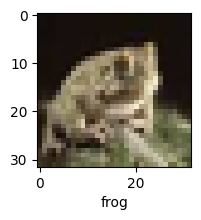

In [14]:
plot_sample(X_train, y_train, 10001)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 242s 150ms/step - loss: 1.8143 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 201s 129ms/step - loss: 1.6250 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 170s 108ms/step - loss: 1.5433 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.4847 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.4315 - accuracy: 0.4967


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55      1000
           1       0.45      0.76      0.57      1000
           2       0.47      0.19      0.27      1000
           3       0.38      0.25      0.30      1000
           4       0.34      0.51      0.41      1000
           5       0.45      0.28      0.34      1000
           6       0.61      0.35      0.44      1000
           7       0.40      0.70      0.51      1000
           8       0.58      0.66      0.61      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 44s 27ms/step - loss: 1.4967 - accuracy: 0.4622
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1200 - accuracy: 0.6099
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9991 - accuracy: 0.6528
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9162 - accuracy: 0.6845
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8564 - accuracy: 0.7030


In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 9ms/step - loss: 0.9424 - accuracy: 0.6822


[0.9423918128013611, 0.682200014591217]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[3.8617216e-03, 1.3189264e-04, 4.5486386e-03, 4.1693711e-01,
        9.5213465e-03, 1.9806859e-01, 2.5735530e-03, 4.1760821e-03,
        3.5921803e-01, 9.6302258e-04],
       [5.2043363e-02, 3.8407540e-01, 1.3658624e-05, 3.6590056e-06,
        4.6966838e-06, 2.0428797e-07, 6.3509077e-07, 5.3188132e-06,
        5.3222209e-01, 3.1631015e-02],
       [8.4121332e-02, 7.4761644e-02, 3.5207714e-03, 3.5838084e-03,
        3.8776528e-03, 9.7774772e-04, 2.2389257e-04, 6.9301954e-04,
        7.9299748e-01, 3.5242651e-02],
       [5.3430003e-01, 9.9967688e-02, 7.7562942e-03, 6.6539529e-04,
        2.1893699e-02, 2.1229749e-05, 4.6456017e-04, 5.9530797e-04,
        3.3236077e-01, 1.9749880e-03],
       [6.8006020e-06, 2.0603327e-05, 6.0624559e-03, 1.5281036e-02,
        9.2340267e-01, 7.8697018e-03, 4.7004398e-02, 3.0557538e-04,
        2.5304969e-05, 2.1480515e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

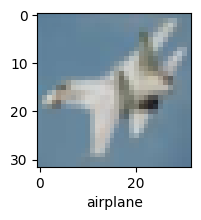

In [30]:
plot_sample(X_test, y_test,10)

In [32]:
classes[y_classes[10]]

'airplane'